In [2]:
import sigpy.plot as pl
import numpy as np
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import scipy.io
from torch.autograd import Variable
% matplotlib notebook

In [3]:
import UFNet

In [5]:
mrf_dict = scipy.io.loadmat('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/fp_dictionary.mat')
# print(MRF_dic.keys())
fp_dict = mrf_dict['fp_dict']
t1_list = mrf_dict['t1_list']
t2_list = mrf_dict['t2_list']
N_dict = t1_list.shape[0]

In [8]:
def read_flipangles(flip_file):
    f = open(flip_file)
    flips =  [float(a) for a in f.readlines()]
    f.close()
    return np.array(flips)
flips = read_flipangles('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/flipangles.txt')
N_flip = len(flips)

In [9]:
fp_dic = np.hstack(list(fp_dict[0][0])).reshape((N_flip, 2, N_dict)).transpose((0, 2, 1))
fp_dic = fp_dic[:,:,0] + 1j * fp_dic[:,:,1]
print(fp_dic.shape)

(500, 22031)


In [10]:
fp_train = fp_dic.transpose(1,0)[:,None,:]

In [11]:
fp_train.shape

(22031, 1, 500)

In [13]:
nd = 7

In [14]:
p = np.random.rand(22031,nd)
p_norm = np.linalg.norm(p,axis=1)
p_normal = p/p_norm[None,:].T
B_tensor = torch.tensor(p_normal)
B_tensor_cuda = B_tensor.cuda()
fp_train_cuda = torch.tensor(abs(fp_train)).cuda()

<IPython.core.display.Javascript object>


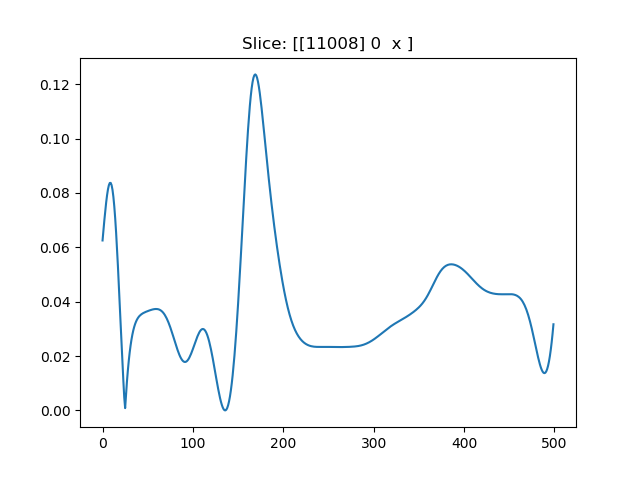

In [15]:
pl.LinePlot(fp_train_cuda.detach().cpu().numpy())

In [16]:
net1 = UFNet.PixelNet(1).cuda()

In [17]:
mac = fp_train_cuda.max(dim=2)
fp_train_cuda = fp_train_cuda[:,0,:]/mac[0]
fp_train_cuda = fp_train_cuda.unsqueeze(1)

<IPython.core.display.Javascript object>


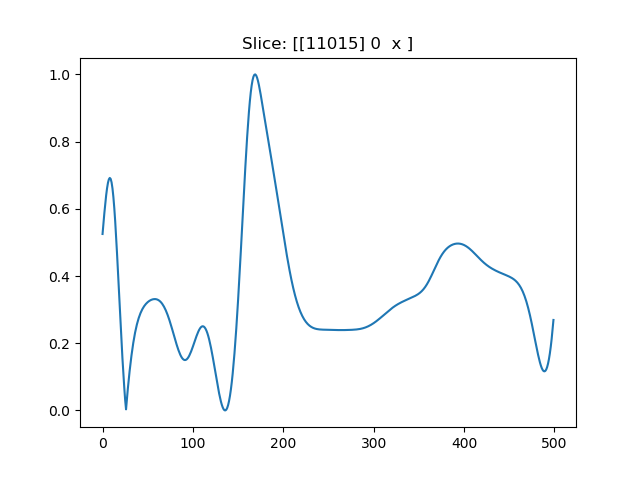

In [18]:
pl.LinePlot(fp_train_cuda.detach().cpu().numpy())

In [19]:
net = UFNet.PixelNet(1).cuda()
with torch.no_grad(): 
    for j in range(22031):
        inp = fp_train_cuda[j,:,:].unsqueeze(0)
        out = net(inp)
#         break
        B_tensor_cuda[j,:] = out
        print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179


3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827


5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514


6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168


8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004


10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
1059

11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
1202

13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
1346

14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
1492

16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
16264
16265
16266
16267
16268
16269
16270
16271
16272
16273
16274
16275
16276
16277
16278
16279
16280
16281
16282
16283
16284
16285
16286
16287
16288
16289
16290
16291
16292
16293
16294
16295
16296
16297
16298
16299
16300
16301
16302
16303
16304
16305
16306
16307
16308
16309
16310
16311
16312
16313
16314
16315
16316
16317
16318
16319
16320
16321
16322
16323
16324
16325
16326
16327
16328
16329
16330
16331
16332
16333
16334
1633

17580
17581
17582
17583
17584
17585
17586
17587
17588
17589
17590
17591
17592
17593
17594
17595
17596
17597
17598
17599
17600
17601
17602
17603
17604
17605
17606
17607
17608
17609
17610
17611
17612
17613
17614
17615
17616
17617
17618
17619
17620
17621
17622
17623
17624
17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
17637
17638
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17657
17658
17659
17660
17661
17662
17663
17664
17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
17675
17676
17677
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17691
17692
17693
17694
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
1774

18977
18978
18979
18980
18981
18982
18983
18984
18985
18986
18987
18988
18989
18990
18991
18992
18993
18994
18995
18996
18997
18998
18999
19000
19001
19002
19003
19004
19005
19006
19007
19008
19009
19010
19011
19012
19013
19014
19015
19016
19017
19018
19019
19020
19021
19022
19023
19024
19025
19026
19027
19028
19029
19030
19031
19032
19033
19034
19035
19036
19037
19038
19039
19040
19041
19042
19043
19044
19045
19046
19047
19048
19049
19050
19051
19052
19053
19054
19055
19056
19057
19058
19059
19060
19061
19062
19063
19064
19065
19066
19067
19068
19069
19070
19071
19072
19073
19074
19075
19076
19077
19078
19079
19080
19081
19082
19083
19084
19085
19086
19087
19088
19089
19090
19091
19092
19093
19094
19095
19096
19097
19098
19099
19100
19101
19102
19103
19104
19105
19106
19107
19108
19109
19110
19111
19112
19113
19114
19115
19116
19117
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
1914

20383
20384
20385
20386
20387
20388
20389
20390
20391
20392
20393
20394
20395
20396
20397
20398
20399
20400
20401
20402
20403
20404
20405
20406
20407
20408
20409
20410
20411
20412
20413
20414
20415
20416
20417
20418
20419
20420
20421
20422
20423
20424
20425
20426
20427
20428
20429
20430
20431
20432
20433
20434
20435
20436
20437
20438
20439
20440
20441
20442
20443
20444
20445
20446
20447
20448
20449
20450
20451
20452
20453
20454
20455
20456
20457
20458
20459
20460
20461
20462
20463
20464
20465
20466
20467
20468
20469
20470
20471
20472
20473
20474
20475
20476
20477
20478
20479
20480
20481
20482
20483
20484
20485
20486
20487
20488
20489
20490
20491
20492
20493
20494
20495
20496
20497
20498
20499
20500
20501
20502
20503
20504
20505
20506
20507
20508
20509
20510
20511
20512
20513
20514
20515
20516
20517
20518
20519
20520
20521
20522
20523
20524
20525
20526
20527
20528
20529
20530
20531
20532
20533
20534
20535
20536
20537
20538
20539
20540
20541
20542
20543
20544
20545
20546
20547
20548
2054

21794
21795
21796
21797
21798
21799
21800
21801
21802
21803
21804
21805
21806
21807
21808
21809
21810
21811
21812
21813
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21842
21843
21844
21845
21846
21847
21848
21849
21850
21851
21852
21853
21854
21855
21856
21857
21858
21859
21860
21861
21862
21863
21864
21865
21866
21867
21868
21869
21870
21871
21872
21873
21874
21875
21876
21877
21878
21879
21880
21881
21882
21883
21884
21885
21886
21887
21888
21889
21890
21891
21892
21893
21894
21895
21896
21897
21898
21899
21900
21901
21902
21903
21904
21905
21906
21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
21947
21948
21949
21950
21951
21952
21953
21954
21955
21956
21957
21958
21959
2196

In [40]:
torch.save(net.state_dict(),
                       '/home/kewang/checkpoints_unf/' + 'CP_final{}.pth'.format(epoch + 1))

<IPython.core.display.Javascript object>


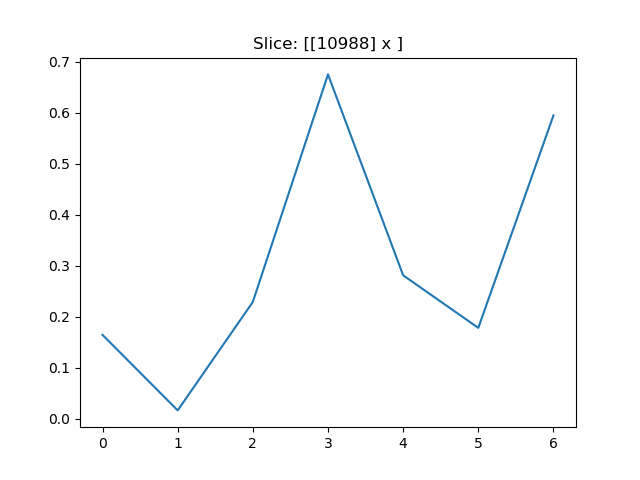

In [22]:
pl.LinePlot(B_tensor_cuda.detach().cpu().numpy())

In [21]:
# Here we train the network
n_dictionary = 22031
n_dimension = 7
tau = 1
epochs = 50
# net = UFNet.PixelNet(1).cuda()
optimizer = torch.optim.Adam(net.parameters(),
                          lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()
loss_all = list([])
index_dic = np.random.permutation(n_dictionary)
batchsize = 64
n_step = int(n_dictionary/batchsize)

num = np.floor(n_dictionary/batchsize).astype(int)

for epoch in range(epochs):
    index_dic = np.random.permutation(n_dictionary)
    net.train()
    epoch_loss = 0
    optimizer.zero_grad()
    print("Starting Epoch: %d" %(epoch+1))
    for index in range(n_step):
        ipd = index_dic[index*batchsize:(index+1)*batchsize]
        
        input_dic = fp_train_cuda[ipd,:,:]
        output_dic = net(input_dic)
#         break
        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
        output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
#             print(output_dic.requires_grad)
#             print(output_dic.shape)
        loss = criterion(output_dic1,torch.LongTensor(ipd).cuda())
        B_tensor_cuda[ipd,:] = output_dic.double()
        if index % 100 == 0:
            print(loss.item())
            loss_all.append(loss.item())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

Starting Epoch: 1
9.99893569946289
9.943588256835938
9.925421714782715
9.913336753845215
Starting Epoch: 2
9.916258811950684
9.660701751708984
9.631124496459961
9.60855770111084
Starting Epoch: 3
9.60234260559082
9.331768035888672
9.314935684204102
9.302716255187988
Starting Epoch: 4
9.272038459777832
9.183298110961914
9.18679141998291
9.179276466369629
Starting Epoch: 5
9.158592224121094
9.139842987060547
9.136787414550781
9.138360977172852
Starting Epoch: 6
9.135156631469727
9.123862266540527
9.125158309936523
9.121230125427246
Starting Epoch: 7
9.12177848815918
9.116584777832031
9.11443042755127
9.11480712890625
Starting Epoch: 8
9.11220645904541
9.10877799987793
9.11179256439209
9.110445022583008
Starting Epoch: 9
9.110825538635254
9.10828971862793
9.108020782470703
9.106681823730469
Starting Epoch: 10
9.103646278381348
9.101054191589355
9.102328300476074
9.100200653076172
Starting Epoch: 11
9.101618766784668
9.099125862121582
9.097091674804688
9.100000381469727
Starting Epoch: 12


In [23]:
B_tensor_test = B_tensor_cuda*0

<IPython.core.display.Javascript object>


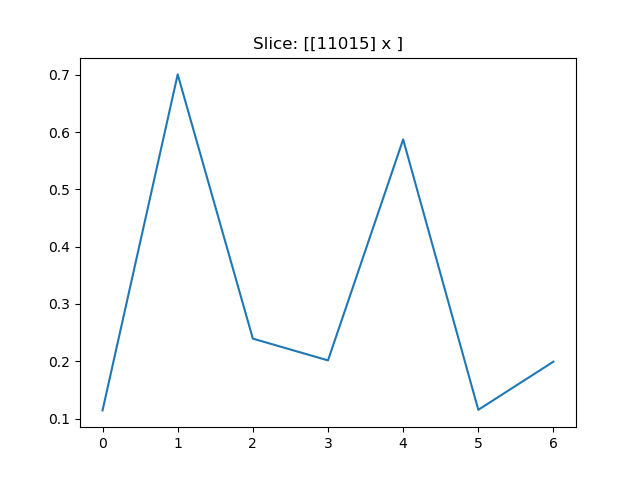

In [24]:
pl.LinePlot(B_tensor_cuda.detach().cpu().numpy())

In [135]:
dic_compressed = B_tensor_test.detach().cpu().numpy()

In [136]:
dic_compressed.min()

-0.9999825954437256

In [80]:
x.shape

(40, 40)

<IPython.core.display.Javascript object>


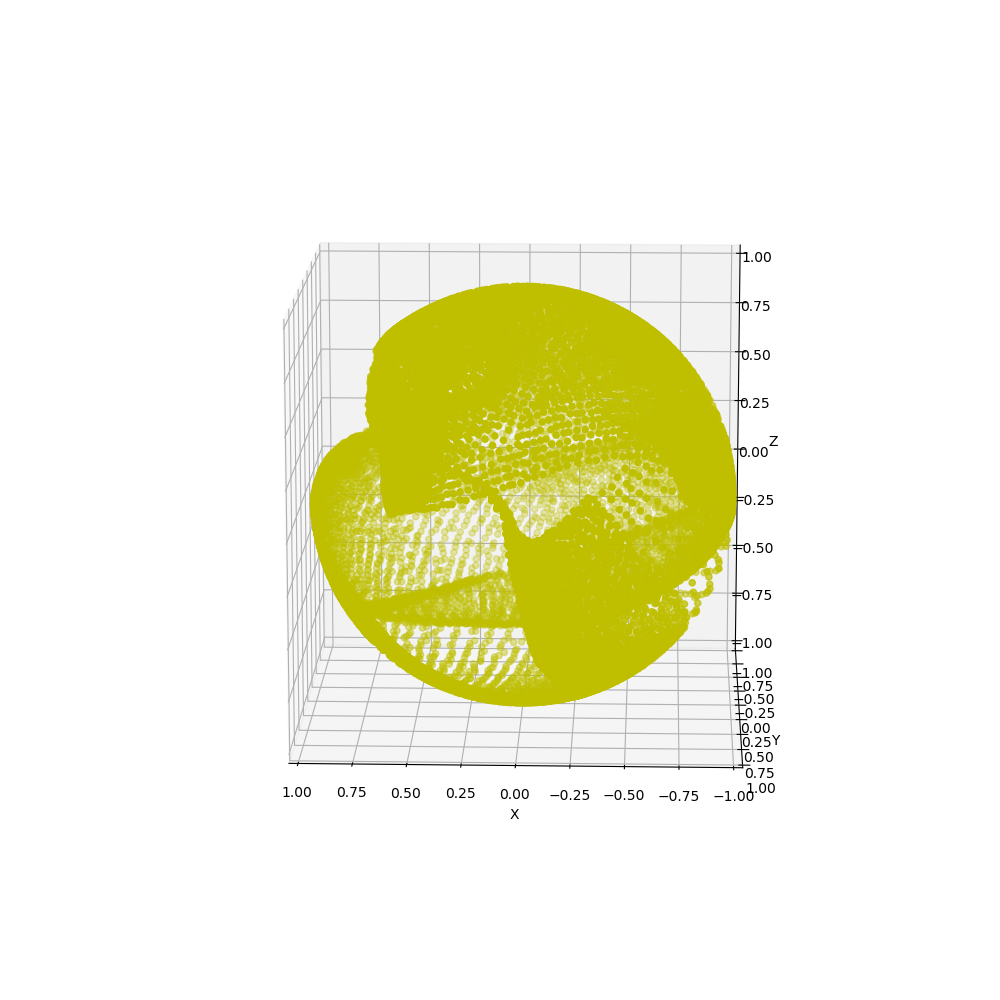

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
dic_compressed = np.load("compressed_dic_final.npy")
# dic_compressed = B_tensor_cuda.detach().cpu().numpy()
# data = np.random.randint(0, 255, size=[40, 40, 40])
plt.figure(figsize=(10,10))
# x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
# ax.scatter(x[:10], y[:10], z[:10], c='y')  # 绘制数据点
# ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
# ax.scatter(x[30:40], y[30:40], z[30:40], c='g')
ax.scatter(dic_compressed[:,0], dic_compressed[:,1], dic_compressed[:,2], c='y')
ax.set_xlim([-1, 1])
ax.set_zlim([-1,1])
ax.set_ylim([-1, 1])

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()


In [27]:
np.save("compressed_output_test_7.npy",B_tensor_test.detach().cpu().numpy())

In [28]:
#MRF
MRF_data = np.load("/mikQNAP/augmented_data/MRF/MRF_norm_volunteer9_4.npy")

In [29]:
t1m = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T1_mapping.npy")
t2m = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T2_mapping.npy")

In [30]:
mrf_dict = scipy.io.loadmat('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/fp_dictionary.mat')
fp_dict = mrf_dict['fp_dict']
t1_list = mrf_dict['t1_list']
t2_list = mrf_dict['t2_list']
t1_t2_list = np.hstack((t1_list, t2_list)) # ms

In [31]:
t1m[100,100]

750.0

In [33]:
MRF_data_complex = abs(MRF_data[:500,:,:]+1j*MRF_data[500:,:,:])

In [34]:
import torch.nn.functional as f

In [36]:
pdata = torch.tensor(MRF_data_complex[:,100,100][None,None,:]).cuda()
pd =pdata/pdata.max()
pout = net(pd)
out = torch.mm(B_tensor_test,pout.transpose(0,1).double())
n = out.argmax()

In [39]:
T1_matrix = np.zeros((320,320))
T2_matrix = np.zeros((320,320))

In [45]:
T1_matrix[150,100]

1840.0

In [40]:
for i in range(320):
    print(i)
    for j in range(320):
        pdata = torch.tensor(MRF_data_complex[:,i,j][None,None,:]).cuda()
        pd =pdata/pdata.max()
        pout = net(pd)
        out = torch.mm(B_tensor_test,pout.transpose(0,1).double())
        n = out.argmax()
        T1_matrix[i,j] = t1_t2_list[n,0]
        T2_matrix[i,j] = t1_t2_list[n,1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<IPython.core.display.Javascript object>


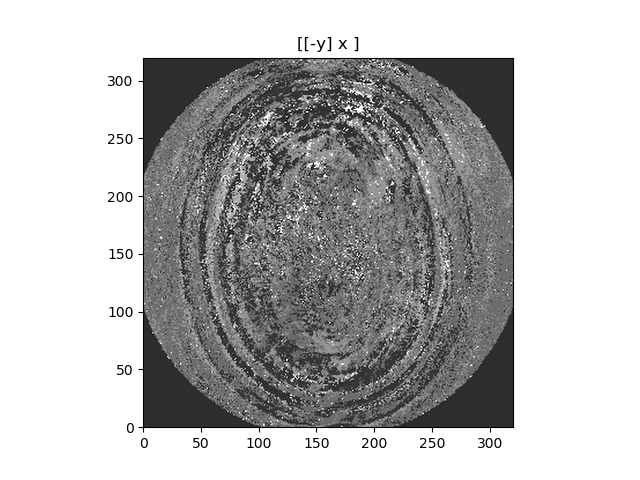

In [46]:
pl.ImagePlot(T1_matrix)

In [125]:
pout.shape

torch.Size([1, 3])

<IPython.core.display.Javascript object>


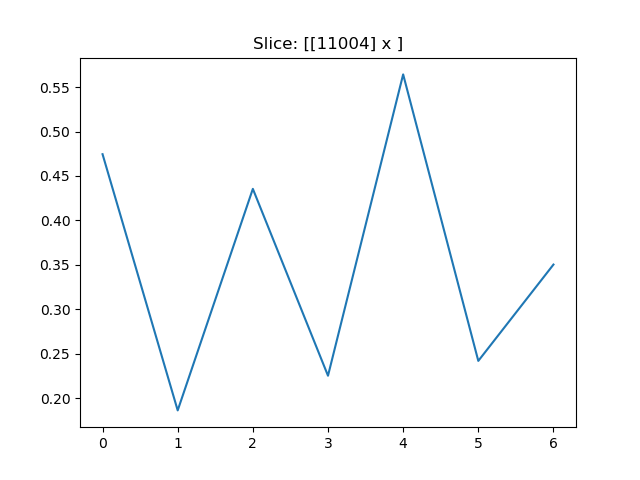

In [26]:
pl.LinePlot(B_tensor_test[:,...].detach().cpu().numpy())

<IPython.core.display.Javascript object>


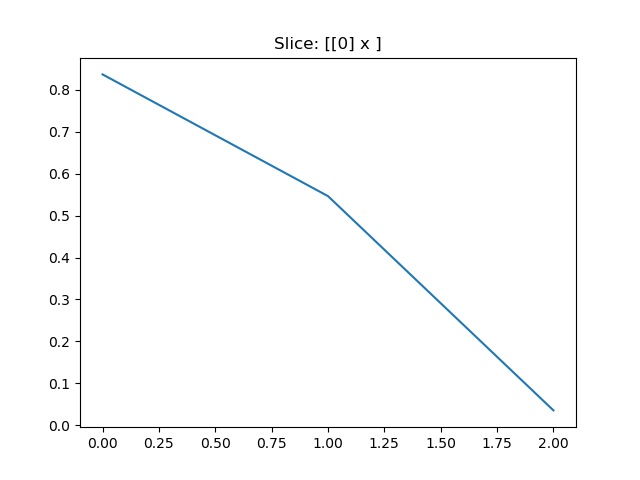

In [126]:
pl.LinePlot(pout.detach().cpu().numpy())

In [127]:
out = torch.mm(B_tensor_test,pout.transpose(0,1).double())

In [130]:
out[2764]

tensor([0.9996], device='cuda:0', dtype=torch.float64,
       grad_fn=<SelectBackward>)

In [129]:
out.argmax()

tensor(2764, device='cuda:0')

In [54]:
B_tensor_test.shape

torch.Size([22031, 3])

In [49]:
pdata.shape

torch.Size([1, 1, 500])

<IPython.core.display.Javascript object>


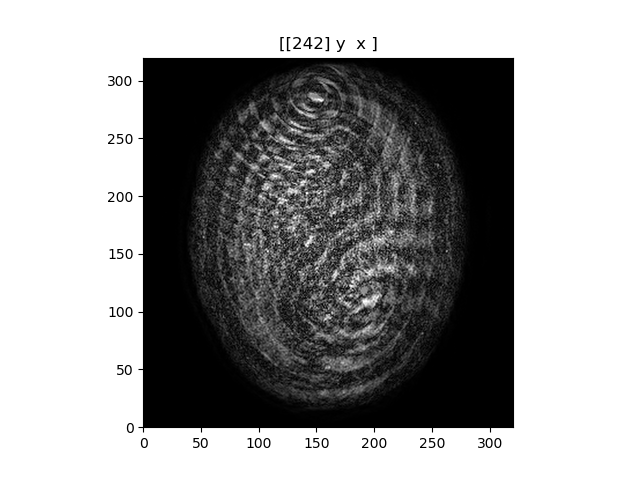

In [44]:
pl.ImagePlot(MRF_data_complex)

In [25]:
with torch.no_grad(): 
    for j in range(22031):
        inp = fp_train_cuda[j,:,:].unsqueeze(0)
        out = net(inp)
        B_tensor_test[j,:] = out
        print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142


3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785


5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587


7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418


9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263


10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
1083

12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
1229

13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
13713
13714
13715
1371

14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
1509

16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
16596
16597
16598
16599
16600
16601
16602
16603
16604
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
16617
16618
16619
16620
16621
16622
16623
16624
16625
16626
16627
16628
16629
16630
16631
16632
16633
16634
16635
16636
16637
16638
16639
16640
16641
16642
16643
16644
16645
16646
16647
16648
16649
16650
16651
16652
1665

17916
17917
17918
17919
17920
17921
17922
17923
17924
17925
17926
17927
17928
17929
17930
17931
17932
17933
17934
17935
17936
17937
17938
17939
17940
17941
17942
17943
17944
17945
17946
17947
17948
17949
17950
17951
17952
17953
17954
17955
17956
17957
17958
17959
17960
17961
17962
17963
17964
17965
17966
17967
17968
17969
17970
17971
17972
17973
17974
17975
17976
17977
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
1808

19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19488
19489
19490
19491
19492
19493
19494
19495
19496
19497
19498
19499
19500
19501
19502
19503
19504
19505
19506
19507
19508
19509
19510
19511
19512
19513
19514
19515
19516
19517
19518
19519
19520
19521
19522
19523
19524
19525
19526
19527
19528
19529
19530
19531
19532
19533
19534
19535
19536
19537
19538
19539
19540
19541
19542
19543
19544
19545
19546
19547
19548
19549
19550
19551
19552
19553
19554
19555
19556
19557
19558
19559
19560
19561
19562
19563
19564
19565
19566
19567
19568
19569
19570
19571
19572
19573
19574
19575
19576
19577
19578
19579
19580
19581
19582
19583
19584
19585
19586
19587
19588
19589
19590
19591
19592
19593
19594
19595
19596
19597
19598
19599
19600
19601
19602
19603
19604
19605
19606
19607
19608
19609
19610
19611
19612
19613
19614
19615
19616
19617
19618
19619
19620
19621
19622
19623
19624
19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
19638
19639
19640
1964

21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
2118

In [24]:
fp_train_1 = fp_train[:,0,:]

In [48]:
fp_dic.shape

(500, 22031)

In [49]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [50]:
pca.fit(fp_dic.T)

/home/kewang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
dictionary_pca = pca.transform(fp_dic.T)

<IPython.core.display.Javascript object>


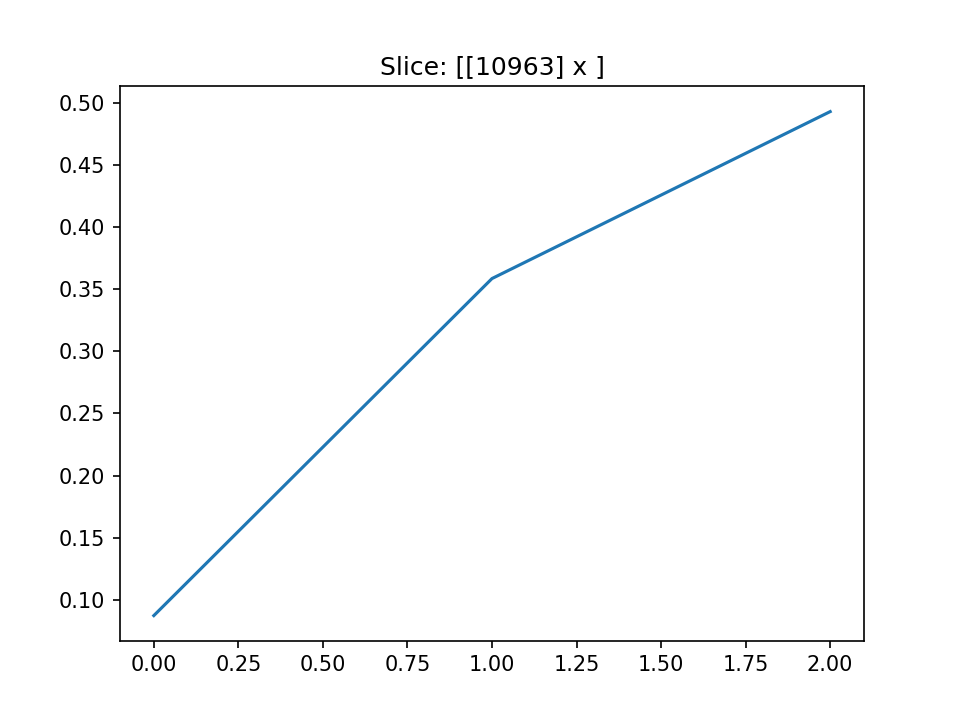

In [56]:
pl.LinePlot(dictionary_pca)

In [35]:
fp_train_1

array([[0.00812182, 0.00944535, 0.01044788, ..., 0.00621854, 0.00690465,
        0.00767356],
       [0.00719178, 0.00948191, 0.01054393, ..., 0.00627772, 0.00697027,
        0.00774634],
       [0.00719182, 0.00948195, 0.01054397, ..., 0.00627775, 0.0069703 ,
        0.00774637],
       ...,
       [0.03346432, 0.03641555, 0.03937593, ..., 0.0121684 , 0.0137765 ,
        0.01552572],
       [0.03335859, 0.0363005 , 0.03925149, ..., 0.01216448, 0.01377423,
        0.01552494],
       [0.03325693, 0.03618988, 0.03913182, ..., 0.01216081, 0.01377223,
        0.01552445]], dtype=float32)

<IPython.core.display.Javascript object>


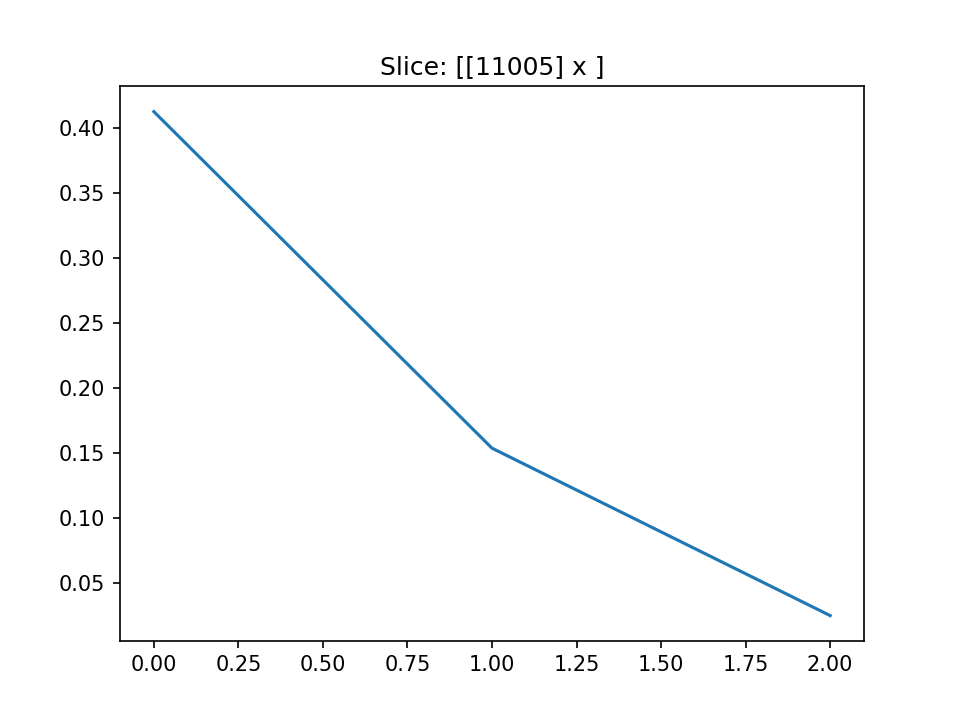

In [42]:
pl.LinePlot(dictionary_pca)

In [18]:
# Here we train the network
n_dictionary = 22031
n_dimension = 3
tau = 0.07
epochs = 10000
net = UFNet.PixelNet(1).cuda()

# net = UFNet.PixelNet(1).cuda()
optimizer = torch.optim.Adam(net.parameters(),
                          lr=0.02)
criterion = torch.nn.CrossEntropyLoss()
loss_all = list([])
index_dic = np.random.permutation(n_dictionary)
batchsize = 8
num = np.floor(n_dictionary/batchsize).astype(int)
net = UFNet.PixelNet(1).cuda()

for epoch in range(epochs):
    index_dic = np.random.permutation(n_dictionary)
    net.train()
    epoch_loss = 0
    optimizer.zero_grad()
    print("Starting Epoch: %d" %(epoch+1))
    for index in range(num):
        
        input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
        output_dic = net(input_dic)
        ipd = index_dic[index*batchsize:(index+1)*batchsize]

        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
        output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
#             print(output_dic.requires_grad)
#             print(output_dic.shape)
        loss = criterion(output_dic1,torch.LongTensor(ipd).cuda())
        
        if index % 1000 == 0:
            print(loss.item())
            loss_all.append(loss.item())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index % 1000 == 0:
#             print(loss.item())
#             loss_all.append(loss.item())
# #         if index >1:
# #             if index % 3000 == 0:
# #                 optimizer.zero_grad()
#         optimizer.step()
#         optimizer.zero_grad()
# #             if index % 1000 == 0:
# #                 print(loss.item())
# #         loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        B_tensor_cuda[ipd,:] = output_dic.double()
#                     optimizer.step()
#     optimizer.zero_grad()
#     for index in range(n_dictionary):
#         input_dic = fp_train_cuda[index,:,:].unsqueeze(0)
#         output_dic = net(input_dic)
#         B_tensor_cuda[index,:] = output_dic


#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
#         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index >1:
#             if index % 5000 == 0:
# #                 optimizer.zero_grad()
#                 optimizer.step()
#                 optimizer.zero_grad()
#             if index % 1000 == 0:
#                 print(loss.item())
#                 loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[index,:] = output_dic
    print('Epoch finished ! Loss: {}'.format(epoch_loss / 22031))
    torch.save(net.state_dict(),
                       '/home/kewang/checkpoints_unf/' + 'CP{}.pth'.format(epoch + 1))
    np.save("loss_all.npy",np.array(loss_all))
    print('Checkpoint {} saved !'.format(epoch + 1))
# for index in range(num):
#         net.train()
#         input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
#         output_dic = net(input_dic)
#         ipd = index_dic[index*batchsize:(index+1)*batchsize]

#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
# #         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
# #         loss = criterion(output_dic,torch.LongTensor(ipd).cuda())
        
# #         if index % 20 == 0:
# #             print(loss.item())
# #             loss_all.append(loss.item())
# #         epoch_loss += loss.item()
# #         optimizer.zero_grad()
# #         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[ipd,:] = output_dic.double()
        
        
# for epoch in range(epochs):
#     index_dic = np.random.permutation(n_dictionary)
#     net.train()
#     epoch_loss = 0
#     optimizer.zero_grad()
#     print("Starting Epoch: %d" %(epoch+1))
#     for index in range(num):
        
#         input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
#         output_dic = net(input_dic)
#         ipd = index_dic[index*batchsize:(index+1)*batchsize]

#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
#         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
#         loss = criterion(output_dic,torch.LongTensor(ipd).cuda())
        
#         if index % 20 == 0:
#             print(loss.item())
#             loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
# #         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
# #         loss.backward()
# #         if index % 1000 == 0:
# #             print(loss.item())
# #             loss_all.append(loss.item())
# # #         if index >1:
# # #             if index % 3000 == 0:
# # #                 optimizer.zero_grad()
# #         optimizer.step()
# #         optimizer.zero_grad()
# # #             if index % 1000 == 0:
# # #                 print(loss.item())
# # #         loss_all.append(loss.item())
# #         epoch_loss += loss.item()
# #         optimizer.zero_grad()
# #         loss.backward()
# #         optimizer.step()
# #         B_tensor_cuda[ipd,:] = output_dic.double()
# #                     optimizer.step()
# #     optimizer.zero_grad()
# #     for index in range(n_dictionary):
# #         input_dic = fp_train_cuda[index,:,:].unsqueeze(0)
# #         output_dic = net(input_dic)
# #         B_tensor_cuda[index,:] = output_dic


# #         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# # #             print(output_dic)
# # #             B_tensor_cuda.requires_grad = False
# #         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# # #             print(output_dic.requires_grad)
# # #             print(output_dic.shape)
# #         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
# #         loss.backward()
# #         if index >1:
# #             if index % 5000 == 0:
# # #                 optimizer.zero_grad()
# #                 optimizer.step()
# #                 optimizer.zero_grad()
# #             if index % 1000 == 0:
# #                 print(loss.item())
# #                 loss_all.append(loss.item())
# #         epoch_loss += loss.item()
# #         optimizer.zero_grad()
# #         loss.backward()
# #         optimizer.step()
# #         B_tensor_cuda[index,:] = output_dic
#     print('Epoch finished ! Loss: {}'.format(epoch_loss / 22031))
#     torch.save(net.state_dict(),
#                        '/home/kewang/checkpoints_unf/' + 'CP{}.pth'.format(epoch + 1))
#     np.save("loss_all.npy",np.array(loss_all))
#     print('Checkpoint {} saved !'.format(epoch + 1))

Starting Epoch: 1
9.999202728271484
11.29763412475586
11.82718563079834
Epoch finished ! Loss: 1.422570584013082
Checkpoint 1 saved !
Starting Epoch: 2
9.999195098876953
9.998961448669434
10.003083229064941
Epoch finished ! Loss: 1.2496942301364877
Checkpoint 2 saved !
Starting Epoch: 3
10.000502586364746
9.999582290649414
9.999588966369629
Epoch finished ! Loss: 1.2496296408757452
Checkpoint 3 saved !
Starting Epoch: 4
10.002862930297852
9.99974536895752
10.000652313232422
Epoch finished ! Loss: 1.2496295875451313
Checkpoint 4 saved !
Starting Epoch: 5
9.999897003173828
10.000311851501465
10.00069522857666
Epoch finished ! Loss: 1.2496289165403844
Checkpoint 5 saved !
Starting Epoch: 6
9.99995231628418
9.99937915802002
9.99991512298584
Epoch finished ! Loss: 1.2496281983518962
Checkpoint 6 saved !
Starting Epoch: 7
9.999719619750977
9.999177932739258
10.000679969787598
Epoch finished ! Loss: 1.249629861210831
Checkpoint 7 saved !
Starting Epoch: 8
10.000503540039062
10.001120567321777

KeyboardInterrupt: 

In [ ]:
for epoch in range(epochs):
    index_dic = np.random.permutation(n_dictionary)
    net.train()
    epoch_loss = 0
    optimizer.zero_grad()
    print("Starting Epoch: %d" %(epoch+1))
    for index in range(num):
        
        input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
        output_dic = net(input_dic)
        ipd = index_dic[index*batchsize:(index+1)*batchsize]

        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
        output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
#             print(output_dic.requires_grad)
#             print(output_dic.shape)
        loss = criterion(output_dic,torch.LongTensor(ipd).cuda())
        
        if index % 20 == 0:
            print(loss.item())
            loss_all.append(loss.item())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index % 1000 == 0:
#             print(loss.item())
#             loss_all.append(loss.item())
# #         if index >1:
# #             if index % 3000 == 0:
# #                 optimizer.zero_grad()
#         optimizer.step()
#         optimizer.zero_grad()
# #             if index % 1000 == 0:
# #                 print(loss.item())
# #         loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[ipd,:] = output_dic.double()
#                     optimizer.step()
#     optimizer.zero_grad()
#     for index in range(n_dictionary):
#         input_dic = fp_train_cuda[index,:,:].unsqueeze(0)
#         output_dic = net(input_dic)
#         B_tensor_cuda[index,:] = output_dic


#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
#         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index >1:
#             if index % 5000 == 0:
# #                 optimizer.zero_grad()
#                 optimizer.step()
#                 optimizer.zero_grad()
#             if index % 1000 == 0:
#                 print(loss.item())
#                 loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[index,:] = output_dic
    print('Epoch finished ! Loss: {}'.format(epoch_loss / 22031))
    torch.save(net.state_dict(),
                       '/home/kewang/checkpoints_unf/' + 'CP{}.pth'.format(epoch + 1))
    np.save("loss_all.npy",np.array(loss_all))
    print('Checkpoint {} saved !'.format(epoch + 1))

<IPython.core.display.Javascript object>


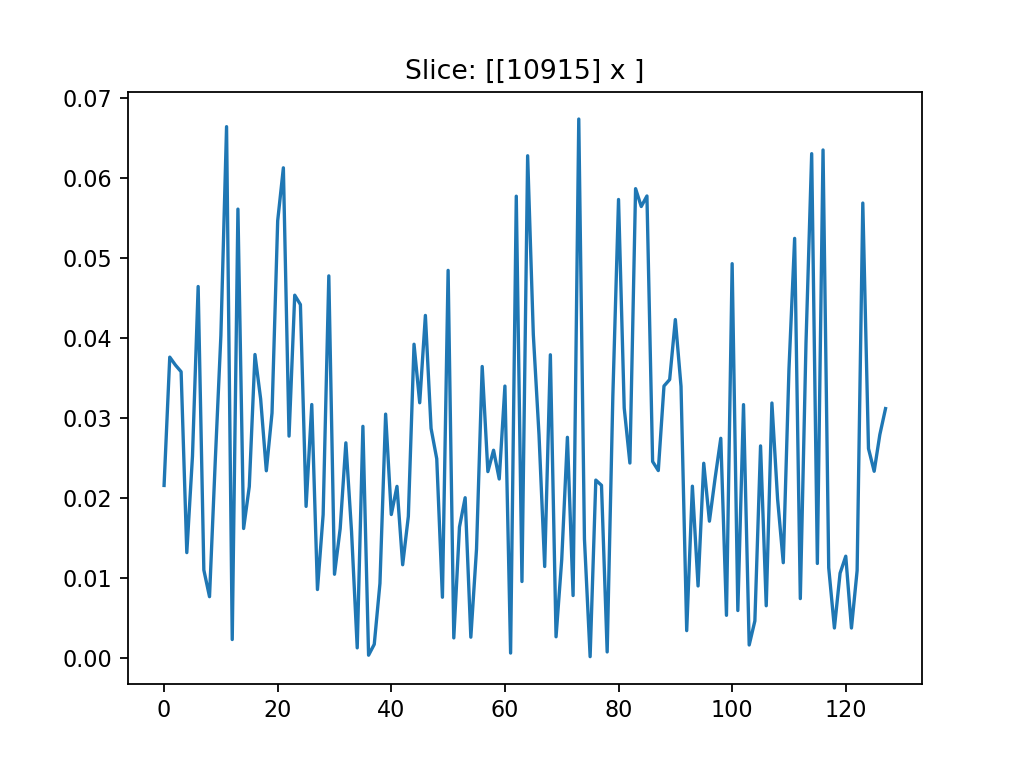

In [19]:
pl.LinePlot(B_tensor_cuda.detach().cpu().numpy())

In [13]:
index

256

In [22]:
print(index)

256


In [14]:
tau = 0.07

In [18]:
input_dic = fp_train_cuda[10000,:,:].unsqueeze(0)
output_dic = net(input_dic)

In [19]:
output_dic.argmax()

tensor(15911, device='cuda:0')

In [56]:
net = UFNet.PixelNet(1).cuda()

<IPython.core.display.Javascript object>


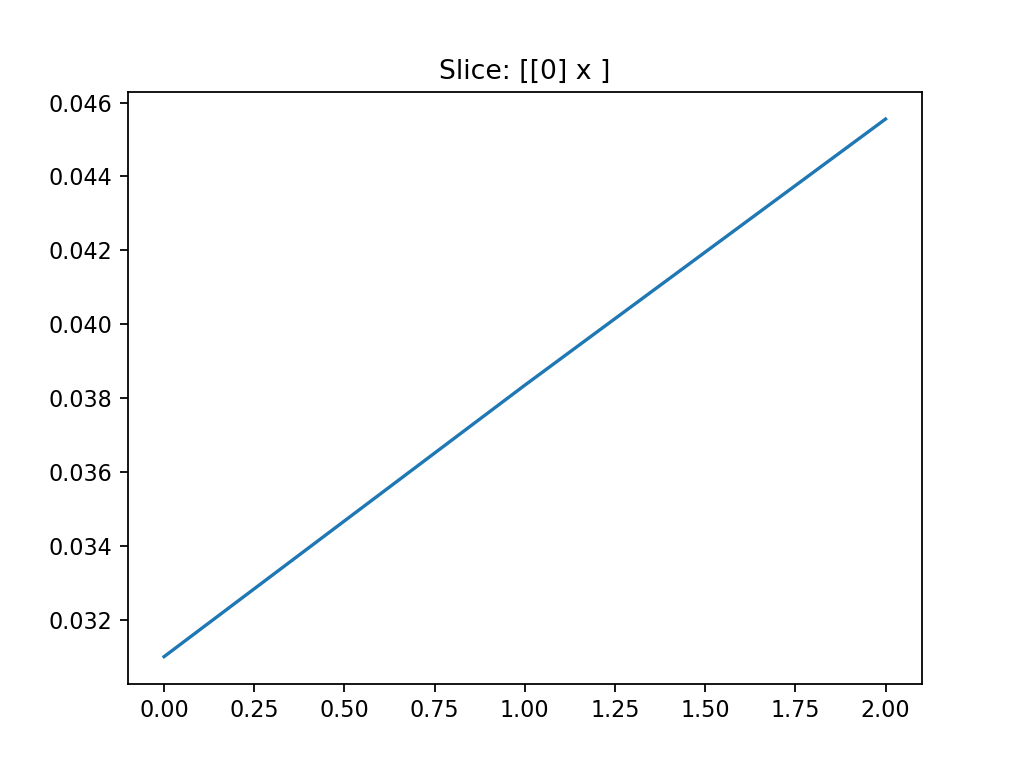

In [21]:
input_dic = fp_train_cuda[20000,:,:].unsqueeze(0)
output_dic = net(input_dic)
input_dic2 = fp_train_cuda[1000,:,:].unsqueeze(0)
output_dic2 = net(input_dic2)
b = output_dic.detach().cpu().numpy() - output_dic2.detach().cpu().numpy()
pl.LinePlot(b)
        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
# output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
# loss = criterion(output_dic1,torch.LongTensor([1000]).cuda())

In [37]:
loss.item()

8.09029769897461

<IPython.core.display.Javascript object>


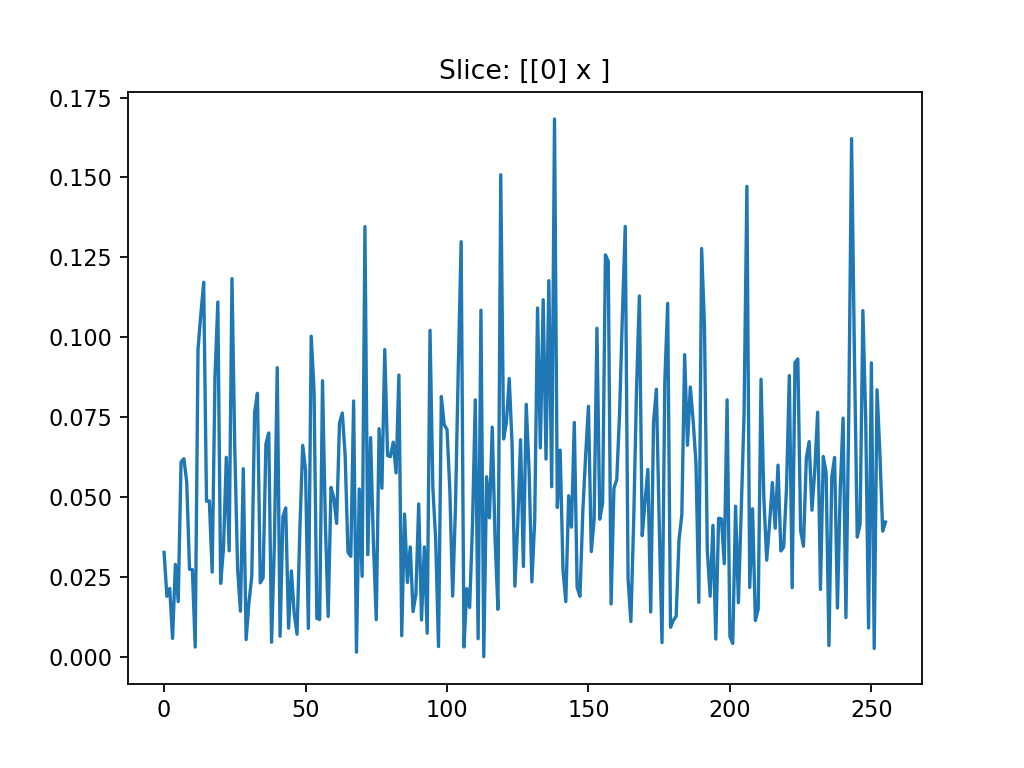

In [44]:
input_dic_test = fp_train_cuda[10000,:,:].unsqueeze(0)
output_dic_test = net(input_dic_test)
pl.LinePlot(output_dic_test.detach().cpu().numpy())
output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau
loss = cc(output_dic1_test,torch.LongTensor([20000]).cuda())
# output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau

In [43]:
loss

tensor(11.4399, device='cuda:0', grad_fn=<NllLossBackward>)

In [441]:
net_uf = UFNet.PixelNet(1)

In [442]:
net_ufcuda = net_uf.cuda()

In [289]:
input_dic_test = fp_train_cuda[500,:,:].unsqueeze(0)
output_dic_test = net_ufcuda(input_dic_test)
output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau

In [25]:
cc = nn.CrossEntropyLoss()

In [292]:
loss = cc(output_dic1_test,torch.LongTensor([500]).cuda())

In [478]:
fp_train.shape

(22031, 1, 500)

In [520]:
nt = UFNet.PixelNet(1)
nt.load_state_dict(torch.load("../checkpoints_unf/CP28.pth"))
nt0 = nt.cuda()
input_dic_test = fp_train_cuda[0,:,:].unsqueeze(0)
output_dic_test = net_ufcuda(input_dic_test)
output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau
loss = cc(output_dic1_test,torch.LongTensor([10000]).cuda())
# pl.LinePlot(B_tensor_cuda[5000,:].detach().cpu().float().numpy())

In [521]:
output_dic_test

tensor([[-0.0278, -0.0461, -0.0051, -0.0124, -0.0692,  0.0511,  0.0777,  0.0511,
          0.0567, -0.0022,  0.0076,  0.0045,  0.0049,  0.0321,  0.1048,  0.0309,
          0.0544, -0.0074, -0.0242,  0.0515,  0.0363,  0.0095,  0.0489,  0.0086,
          0.0490,  0.0192, -0.0337, -0.0077,  0.0684, -0.0242,  0.0626,  0.0815,
          0.0052,  0.0565, -0.0044,  0.0338,  0.0278,  0.0514, -0.0107,  0.1118,
         -0.0688, -0.0089, -0.0039,  0.0122,  0.1443,  0.1217,  0.0898,  0.0593,
          0.0437, -0.0194,  0.0074,  0.0447,  0.0516, -0.0468,  0.0496, -0.0541,
          0.0405,  0.1281, -0.0651, -0.0795,  0.0337,  0.0210, -0.0542, -0.0216,
          0.1200,  0.0169, -0.0289,  0.0526,  0.0012, -0.0061, -0.0118,  0.0770,
          0.1753,  0.0779,  0.1007,  0.0489,  0.0584, -0.0285,  0.0304, -0.0060,
          0.0087,  0.0344,  0.0186,  0.0361,  0.0037, -0.0170,  0.0988, -0.0226,
          0.1394,  0.0632, -0.0258,  0.0235,  0.0228,  0.0115,  0.0344, -0.0147,
         -0.0226,  0.0684,  

In [438]:
output_dic1_test.max()*tau

tensor(0.9967, device='cuda:0', grad_fn=<MulBackward0>)

In [439]:
B_tensor_cuda = B_tensor.cuda()

In [444]:
train_net(net_ufcuda,1000,1,0.03)

Starting Epoch: 1
11.231678009033203
6.898996353149414
6.962409019470215
6.873554229736328
6.893313407897949
6.816213607788086
6.804896354675293
5.760597229003906
5.20340633392334
5.425529479980469
5.1975555419921875
6.687837600708008
6.51987361907959
9.288898468017578
9.767376899719238
10.115033149719238
10.125466346740723
10.593745231628418
10.194001197814941
10.508931159973145
10.978161811828613
10.783696174621582
10.766740798950195
Epoch finished ! Loss: 8.061122632038577
Checkpoint 1 saved !
Starting Epoch: 2
20.588075637817383
5.318092346191406
6.355125427246094
6.360411643981934
6.7966413497924805
6.87518310546875
6.898260116577148
8.844487190246582
11.861841201782227
11.217596054077148
11.457673072814941
9.812807083129883
8.857461929321289
9.452831268310547
8.689266204833984
8.37021255493164
8.110657691955566
7.9531755447387695
7.798953056335449
7.5826005935668945
7.615848541259766
6.850124359130859
6.64406681060791
Epoch finished ! Loss: 7.967492470008192
Checkpoint 2 saved !


6.365297317504883
6.355071067810059
6.367959022521973
6.337217330932617
6.332459449768066
6.330414772033691
6.328373908996582
6.32525634765625
6.328667640686035
Epoch finished ! Loss: 6.362062752996278
Checkpoint 17 saved !
Starting Epoch: 18
6.329401969909668
6.345732688903809
6.342577934265137
6.359404563903809
6.3367109298706055
6.330753326416016
6.333625793457031
6.325104713439941
6.32119083404541
6.317575454711914
6.315333366394043
6.328916549682617
6.3058671951293945
6.315369606018066
6.3177385330200195
6.3071441650390625
6.322414398193359
6.28521728515625
6.281154632568359
6.278294563293457
6.278702735900879
6.273176193237305
6.274415969848633
Epoch finished ! Loss: 6.314306086956262
Checkpoint 18 saved !
Starting Epoch: 19
6.274829864501953
6.291385650634766
6.278451919555664
6.302734375
6.277644157409668
6.272641181945801
6.275668144226074
6.269293785095215
6.264781951904297
6.264098167419434
6.264013290405273
6.273113250732422
6.257872581481934
6.262814521789551
6.26803302764

KeyboardInterrupt: 

In [239]:
np.save("bank_003.npy",B_tensor_cuda.detach().cpu().numpy())

In [18]:
load = np.load("../unsupervised_fingerprinting/Bank.npy")

<IPython.core.display.Javascript object>


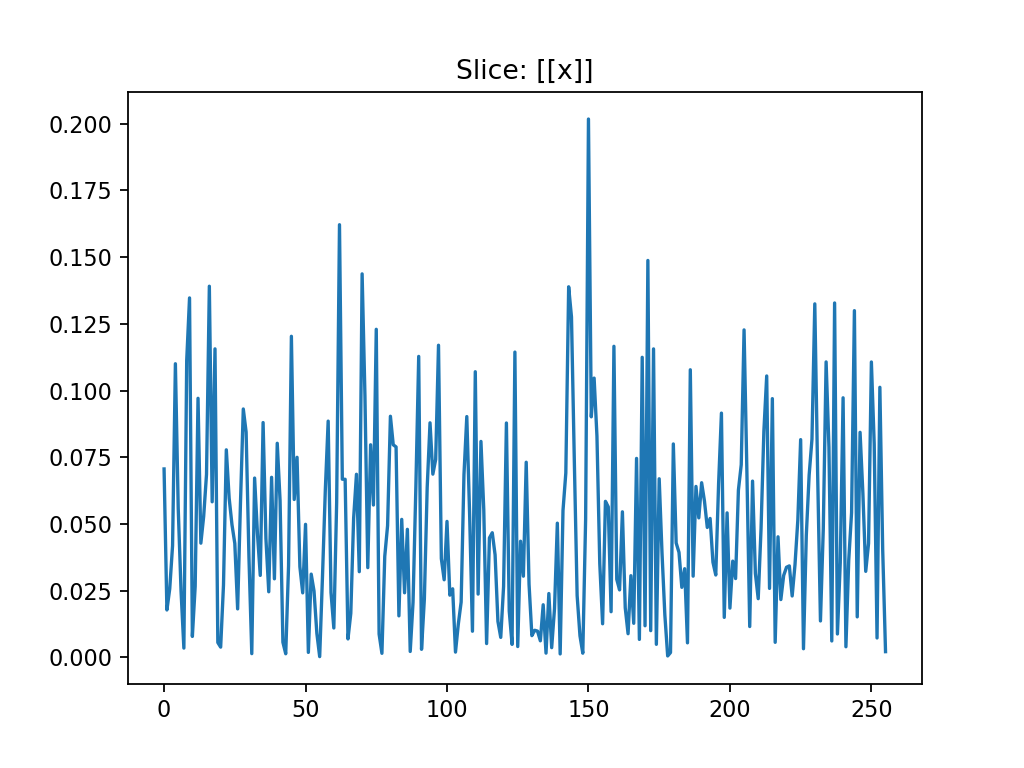

In [22]:
pl.LinePlot(load[100,:])

In [319]:
MRF_data = np.load("/home/kewang/Pytorch-UNet/data/augmented_data/MRF/MRF_norm_volunteer9_4.npy")

In [320]:
T1_mapping = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T1_mapping.npy")
T2_mapping = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T2_mapping.npy")

In [321]:
MRF_data.shape

(1000, 320, 320)

In [ ]:
pl.LinePlot()

In [406]:
signal = MRF_data[:,100,100]

In [407]:
SP_real = signal[:500][None,None,:]
SP_image = signal[500:][None,None,:]

In [408]:
SP = np.concatenate((SP_real,SP_image),1)

<IPython.core.display.Javascript object>


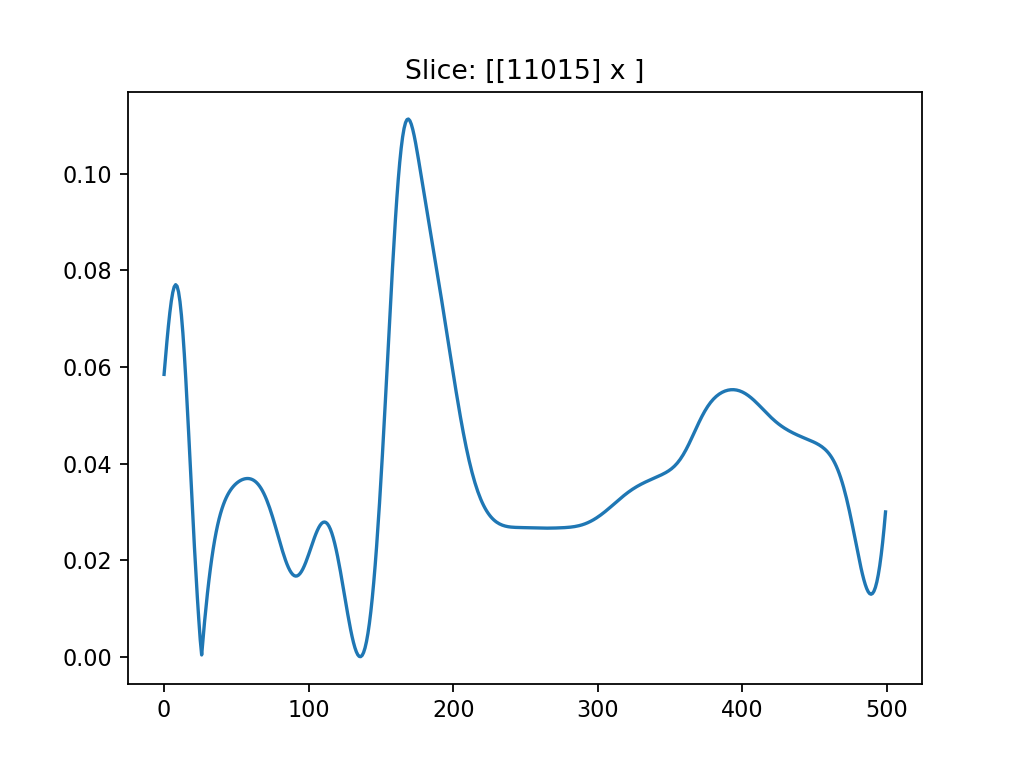

In [416]:
pl.LinePlot(fp_train[:,0,:]+1j*fp_train[:,1,:])

In [410]:
SP_t = torch.tensor(SP).cuda()

In [411]:
output_sp = nt0(SP_t)

In [412]:
output_sp1 = torch.mm(output_sp,B_tensor_cuda.detach().float().transpose(0,1))

In [413]:
output_sp1.shape

torch.Size([1, 22031])

In [414]:
output_sp1.argmax()

tensor(1126, device='cuda:0')

In [374]:
t1_t2_list = np.hstack((t1_list, t2_list)) # ms

In [380]:
t1_t2_list[1126,0]

96

In [377]:
T2_mapping[100,100]

98.0

<IPython.core.display.Javascript object>


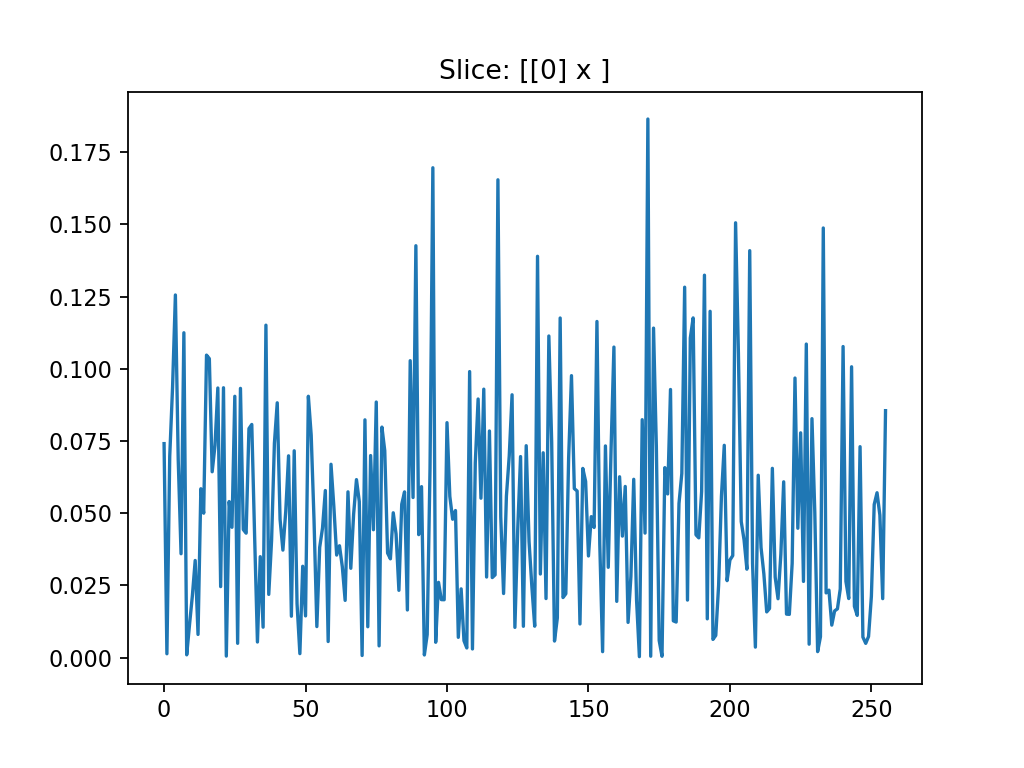

In [332]:
pl.LinePlot(output_sp.detach().cpu().numpy())

<IPython.core.display.Javascript object>


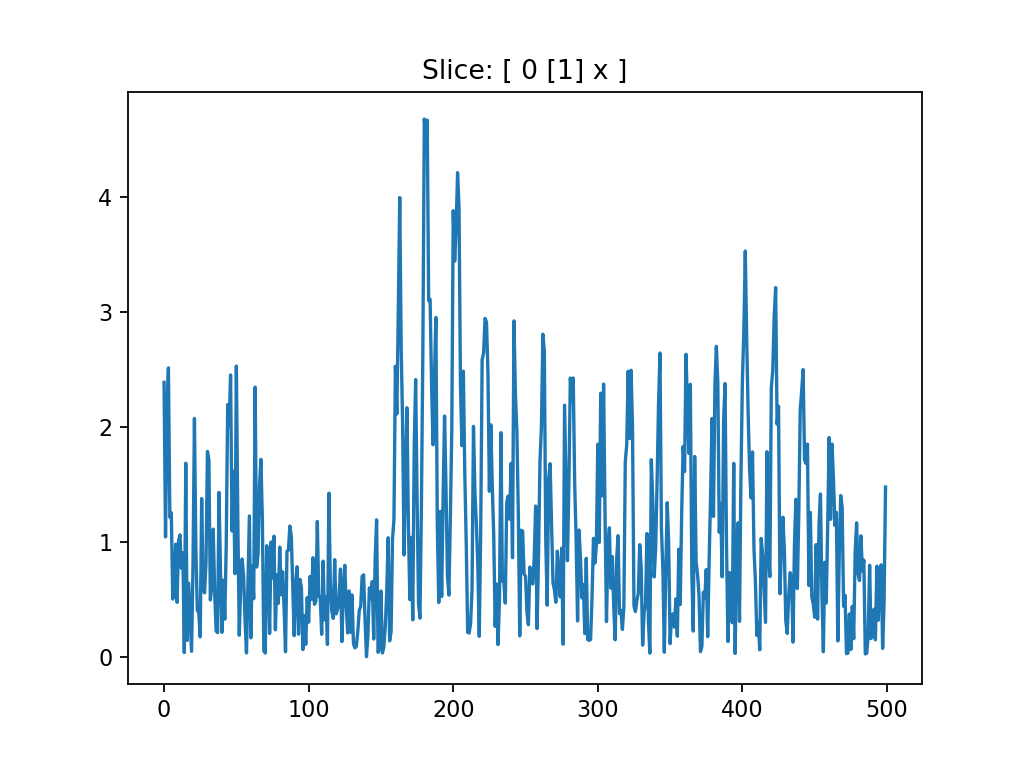

In [328]:
pl.LinePlot(SP)